In [95]:
# IMPORTING MODULES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from math import *

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

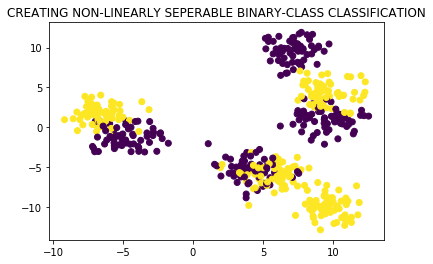

In [96]:
# CREATING BINARY-CLASS CLASSIFICATION DATASET { 2-FEATURES} AND { NON-LINAERLR -SEPERABLE}
from sklearn.datasets import make_blobs
plt.figure()
plt.title('CREATING NON-LINEARLY SEPERABLE BINARY-CLASS CLASSIFICATION')
x,y=make_blobs(n_samples=500,n_features=2,random_state=4,centers=8,cluster_std = 1.3)
y=y%2 # used to convert multi-class to binary-class
plt.scatter(x[:,0],x[:,1],c=y)
plt.show()

In [97]:
print(x.shape,y.shape,sep='\n')

(500, 2)
(500,)


In [88]:
# TRAIN AND TEST SPLIT DATASET
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2 ,random_state=0)



In [98]:
# TRAIN THE MODEL
svm=SVC(C=1,kernel='linear')
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test)*100)

51.0


In [92]:
# GRIDSEARCH CV TO FIND BEST VALUE OF HYPERPARAMETERS OF SVM
from sklearn.model_selection import GridSearchCV
param=[{'C':[0.5,1,1.5],'kernel':['linear']},
      {'C':[0.1,0.2,0.3,0.4,0.5,1,1.5,2],'kernel':['rbf'],'gamma':[0.01,0.3,0.7,1,1.4]}]
classifier_svm=SVC()
grid_search=GridSearchCV(classifier_svm,param_grid=param,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(x,y) # meta classifier


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.5, 1, 1.5], 'kernel': ['linear']},
                         {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 1, 1.5, 2],
                          'gamma': [0.01, 0.3, 0.7, 1, 1.4],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [93]:
grid_search.best_params_

{'C': 0.3, 'gamma': 0.3, 'kernel': 'rbf'}

In [94]:
grid_search.best_estimator_

SVC(C=0.3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.3, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [87]:
# TRAIN THE MODEL
svm=SVC(C=0.3,kernel='rbf',gamma=0.3)
svm.fit(x_train,y_train)
print(svm.score(x_test,y_test)*100)

89.0


In [68]:
# PREPARATION OF THE GRID
arr1=np.arange(x[:,0].min()-1,x[:,0].max()+1,0.01)
arr2=np.arange(x[:,1].min()-1,x[:,1].max()+1,0.01)
xx,yy=np.meshgrid(arr1,arr2)
print(xx.shape,yy.shape,sep='\n')
print(790*440)

(2677, 2375)
(2677, 2375)
347600


In [7]:
# CLASSIFYING EACH POINT ON THE GRID
input_array=np.array([xx.ravel(),yy.ravel()]).T
labels=svm.predict(input_array)


In [ ]:
# PLOT THE OUTPUT DECISION BOUNDARY
plt.contourf(xx,yy,labels.reshape(xx.shape),alpha=0.8)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)